Imports

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import cv2
import os
from scipy.cluster.hierarchy import linkage, fcluster
from skimage import io

#Imports gestion de bordes

from ipynb.fs.full.bordes import genera_bordes


#imports extraccion caracteristicas

from ipynb.fs.full.caracteristicas_med import caractmRGB
from ipynb.fs.full.caracteristicas_med import caractmRGB2
from ipynb.fs.full.caracteristicas_med import caractmHSV
from ipynb.fs.full.caracteristicas_med import caractmHSV2
from ipynb.fs.full.caracteristicas_med import caractmHSV3
from ipynb.fs.full.caracteristicas_med import caractmXYZ
from ipynb.fs.full.caracteristicas_med import caractmXYZ2


#Imports combinación segmentaciones

from ipynb.fs.full.Megapixels import mas_superpixeles
from ipynb.fs.full.Megapixels import elimino1
from ipynb.fs.full.Megapixels import une_segments
from ipynb.fs.full.Megapixels import une_segments2
from ipynb.fs.full.Megapixels import quita_pequenos
from ipynb.fs.full.Megapixels import reordenar

#Imports tests

from ipynb.fs.full.Tests import test_BR
from ipynb.fs.full.Tests import ASA


Cargamos todas las imagenes de intercambio para poder usarlas

In [2]:

# Ruta de la carpeta de intercambio
ruta = 'compartir'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(ruta)

# Filtrar los archivos con extensiones .jpg y .npy
archivos_jpg = [archivo for archivo in archivos if archivo.endswith('.jpg')]
archivos_npy = [archivo for archivo in archivos if archivo.endswith('.npy')]
# Cargar imágenes .jpg

print("IMAGENES:")
for archivo_jpg in archivos_jpg:
    ruta_jpg = os.path.join(ruta, archivo_jpg)
    nombre=archivo_jpg[:-4]
    imagen = cv2.imread(ruta_jpg)
    #imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    # Crear una cadena de texto que representa la asignación
    codigo_asignacion = f"{nombre} = imagen"
    # Ejecutar la cadena de texto usando exec()
    exec(codigo_asignacion)
#     print(nombre)

print("SEGMENTACIONES:")
# Cargar archivos Numpy .npy
for archivo_npy in archivos_npy:
    ruta_npy = os.path.join(ruta, archivo_npy)
    nombre=archivo_npy[:-4]
    archivo = np.load(ruta_npy)
    # Crear una cadena de texto que representa la asignación
    codigo_asignacion = f"{nombre} = archivo"

    # Ejecutar la cadena de texto usando exec()
    exec(codigo_asignacion)
#     print(nombre)


    



IMAGENES:
image
imagen_org
int_bordes_mod
prueba
segmentation_FH
segmentation_QS
segmentation_SEEDS
segmentation_SLIC
SEGMENTACIONES:
bordes_FH
bordes_FH2
bordes_FQ_bordes2
bordes_FSE_bordes2
bordes_FSL_bordes2
bordes_image_G_S
bordes_limpios
bordes_mejorados
bordes_QS
bordes_QS2
bordes_SEEDS
bordes_SEEDS2
bordes_segmentacion_mejorada
bordes_segmentacion_mejoradav2
bordes_separados
bordes_SLIC
bordes_SLIC2
bordes_union_bordes2
canny
foto
image_G_S
int_bordes
int_bordes1
int_bordes_mod
n_bordes
n_bordes_FQ
n_bordes_FSE
n_bordes_FSL
n_bordes_QSE
n_bordes_QSL
n_segmentation
n_segments
n_segments_bordes2
n_segments_FQ
n_segments_FSE
n_segments_FSL
n_segments_QSE
n_segments_QSL
segmentacion_mejorada
segmentacion_mejoradav2
segments_FH
segments_FQ_bordes2
segments_FSE_bordes2
segments_FSL_bordes2
segments_QS
segments_SEEDS
segments_SLIC
sum_bordes


Hemos cargado todos los datos de intercambio

In [3]:
imagen_org=cv2.cvtColor(imagen_org, cv2.COLOR_BGR2RGB)

In [4]:
# plt.figure(figsize=(20, 20))

# plt.title('imagen')
# plt.imshow(imagen_org)
# plt.axis('off')

In [5]:
#Todos

n_segments=segmentacion_mejoradav2
n_bordes=bordes_segmentacion_mejoradav2



In [6]:
# plt.figure(figsize=(30, 30))

# plt.subplot (1,2,1)
# plt.title("Segmentacion",fontsize=20)
# plt.imshow(n_segments, cmap="grey")
# plt.axis('off')

# plt.subplot (1,2,2)
# plt.title("Bordes",fontsize=20)
# plt.imshow(n_bordes, cmap="grey")
# plt.axis('off')

In [7]:
image.shape

(321, 481, 3)

In [8]:
def clusterizar(caracterizacion, distancia=0.2,n_max_clusters=10,n_min_clusters=5):
    """funcion que realiza un agrupamiento aglomerativo en función de la caracterizacion, con un corte
    inicial a distancia (valor entre 0 y 1), al que le podemos agregar el numero maximo de clusteres y 
    minimo, en cuyo caso iterara partiendo de la division en distancia hasta alcanazar un numero entre el 
    minimo y el maximo"""

    dist=[0,distancia,1] #proporcion de distancia por la que queremos cortar el arbol (inicial, por pareto y min y max)
    clusters=np.array([0])

    #primer calculo
    
    # Calcular las distancias utilizando el método de enlace
    enlace = linkage(car_spixel, method='average', metric="cityblock")
    #enlace = linkage(car_spixel, method='single',metric="chebyshev")


    # Especificar la proporción de la distancia máxima
    proporcion_distancia_max = dist[1]

    # Obtener la clusterización en función de la proporción de la distancia máxima
    clusters = fcluster(enlace, proporcion_distancia_max * enlace[:, 2].max(), criterion='distance')
          
    while clusters.max()>n_max_clusters or clusters.max()<n_min_clusters:

        # Calcular las distancias utilizando el método de enlace
        enlace = linkage(car_spixel, method='average')
        #enlace = linkage(car_spixel, method='single',metric="chebyshev")
        
        
        # Especificar la proporción de la distancia máxima
        proporcion_distancia_max = dist[1]

        # Obtener la clusterización en función de la proporción de la distancia máxima
        clusters = fcluster(enlace, proporcion_distancia_max * enlace[:, 2].max(), criterion='distance')

        if clusters.max()<n_min_clusters:
#             print("+ antes de recalcular:",dist, "(clusters ",clusters.max(),")")
            dist[2]=dist[1]
            dist[1]=((dist[1]-dist[0])/2)+dist[0]
#             print("+ despues de recalcular:",dist,"(clusters ",clusters.max(),")")
        elif clusters.max()>n_max_clusters:
#             print("- antes de recalcular:", dist,"(clusters ",clusters.max(),")")
            dist[0]=dist[1]
            dist[1]=((dist[2]-dist[1])/2)+dist[1]
#             print("- despues de recalcular:",dist,"(clusters ",clusters.max(),")")

#     print("clusters:", clusters.max(),clusters)
#     print("clusters:", clusters.max())
    return clusters,clusters.max()


In [9]:
def une_super(segmentacion,distancias,clusters):
    """Dada una segmentacion unas distancias y una clusterizacion, une los elementos
    con el mas parecido que pertenezca a su cluster"""
    
    import cv2
    import numpy as np
    
    vecinos=[]
    distancias_rel=[]
    modulo=[]
    
    #cojo los difernentes segmentos generados"
    elem=np.unique(segmentacion)
#     print("segmentos: ", elem)
    
#     #cojo los elementos que tienen borde
#     elem_borde=np.unique(np.where(bordes==1,segmentacion,np.inf))
    
    #calculo el tamaño de cada segmentacion y el total, identificacion
    
    total=segmentacion.shape[0]*segmentacion.shape[1]
    #print("pixeles totales: ", total)
   
    # Crear un kernel para la dilatación (en este caso, un cuadro 3x3)
    kernel = np.ones((3, 3), np.uint8)
    
    for i in elem:
        aux=(segmentacion==i)
        #print("valores aux:",np.unique(aux))
        #si contiene borde lo uno con su mejor vecino, si no, no.
        #print("Pixeles de borde en la imagen: ",np.sum(np.where(bordes==1,1,0)))
        #print("Tamaño del segmento: ",np.sum(np.where(segmentacion==1,1,0)))
        #print("Nº pixeles en segemento con borde: ",np.sum(np.where((aux+bordes)==2,1,0)))
#         borde=np.sum(np.where((aux+bordes)==2,1,0))

        # Aplicar la dilatación al segmento
#         aux=(segmentacion==i)
        aux=aux.astype(np.uint8)
        #print(type(aux))
        #print("segmento trabajo: ",i,"Tamaño inicial: ",np.sum(aux==1))
        aux_dilatado= cv2.dilate(aux, kernel, iterations=1)
        #print("Tamaño final: ",np.sum(aux_dilatado==1))
        
        aux_dilatado=aux_dilatado-aux
        total=np.sum(aux_dilatado)
#         print("tamaño borde:",total)

        #busco los vecinos sobre la segmentacion con la mascara dilatada

        vecinos=np.unique(np.where(aux_dilatado==1,segmentacion,i))
#         print("vector de vecinos: ",vecinos)
        perfil=aux_dilatado * segmentacion

        for v in vecinos:
            #print("segmento: ",i,"caracteristicas: ", distancias[i])
            #print("segmento: ",dato[0])
            #print("caracteristicas: ", distancias[dato[0]])
            #print("segmento vecino: ",v,"caracteristicas: ", distancias[v])
            dist=distancias[i] - distancias[v]

            if v==i: modulo.append(np.inf)
#             elif v in elem_borde: modulo.append(np.inf)
            else: modulo.append(np.linalg.norm(dist))
            #print("REL: ", distancias_rel,"valor: ",modulo)

        parecido=vecinos[np.argmin(modulo)]
        #print("el mas parecido es: ",parecido)

        #sustituyo el segmento por el mas parecido

        #print("Segmento eliminado: ",i," sustituido por: ",parecido, "puntos anteriores: ", np.sum(segmentacion==i))
        if clusters[i]==clusters[parecido]:
#             print("cluster pixel: ",clusters[i], "cluster mejor vecino: ",clusters[parecido])
#             print("uno: ",i, "con: ",parecido)

            total_v=np.sum(np.where(perfil==parecido,1,0))

#                 print("cluster segmento: ",clusters[i], "cluster vecino: ",clusters[v])           
            #si son del mismo cluster y su frontera común es relevante >5% o mayor de 50 pixeles los uno
        if clusters[i]==clusters[parecido] and (total_v/total >=0.05 or total_v>=50):
            segmentacion=np.where(segmentacion==i,parecido,segmentacion)
        #print("El segmento: ",i, "queda: ",np.sum(segmentacion==i))

        modulo=[] 
        #print("Nuevos segmentos= ",np.unique(segmentacion))
            
    
    return segmentacion,len(elem)


In [10]:
def une_alrededor(segmentacion,clusters):
    """Dada una segmentacion y una clusterizacion, une los elementos
    con todos los de alrededor que pertenezca a su cluster"""
    
    import cv2
    import numpy as np
    
    vecinos=[]
    distancias_rel=[]
    modulo=[]
    
    #cojo los difernentes segmentos generados"
    elem=np.unique(segmentacion)
#     print("segmentos: ",len(elem))
    
  
    #calculo el tamaño de cada segmentacion y el total, identificacion
    
    total=segmentacion.shape[0]*segmentacion.shape[1]
    #print("pixeles totales: ", total)
   
    # Crear un kernel para la dilatación (en este caso, un cuadro 3x3)
    kernel = np.ones((3, 3), np.uint8)
    
    for i in elem:
        aux=(segmentacion==i)
#         print("valores aux:",np.unique(aux))
        #si contiene borde lo uno con su mejor vecino, si no, no.
        #print("Pixeles de borde en la imagen: ",np.sum(np.where(bordes==1,1,0)))
        #print("Tamaño del segmento: ",np.sum(np.where(segmentacion==1,1,0)))
        #print("Nº pixeles en segemento con borde: ",np.sum(np.where((aux+bordes)==2,1,0)))
#         borde=np.sum(np.where((aux+bordes)==2,1,0))
                
#         if borde==0:
        
        

        # Aplicar la dilatación al segmento
#         aux=(segmentacion==i)
        aux=aux.astype(np.uint8)
        #print(type(aux))
        #print("segmento trabajo: ",i,"Tamaño inicial: ",np.sum(aux==1))
        aux_dilatado= cv2.dilate(aux, kernel, iterations=1)
        #print("Tamaño final: ",np.sum(aux_dilatado==1))
        
        aux_dilatado=aux_dilatado-aux
#         print("tamaño :",np.sum(aux_dilatado))
        total=np.sum(aux_dilatado)
#         print("tamaño borde:",total)

        #busco los vecinos sobre la segmentacion con la mascara dilatada

        vecinos=np.unique(np.where(aux_dilatado==1,segmentacion,i))
#         print("vector de vecinos: ",vecinos)
        perfil=aux_dilatado * segmentacion

        for v in vecinos:
            if clusters[i]==clusters[v]:
#                 print(np.count_nonzero(perfil == v))
                total_v=np.sum(np.where(perfil==v,1,0))
#                 print("comparte con vecino ",v,",",total_v,"pixeles, un ",round(total_v/total,4),"%")
                #print("segmento: ",i,"caracteristicas: ", distancias[i])
                #print("segmento: ",dato[0])
#                 print("cluster segmento: ",clusters[i], "cluster vecino: ",clusters[v])           
            #si son del mismo cluster y su frontera común es relevante >5% o mayor de 50 pixeles los uno
            if clusters[i]==clusters[v] and (total_v/total >=0.05 or total_v>=50):
#                 print("cluster pixel: ",clusters[i], "cluster vecino: ",clusters[v])
#                 print("uno: ",i, "con: ",v)
                segmentacion=np.where(segmentacion==i,v,segmentacion)
        #print("El segmento: ",i, "queda: ",np.sum(segmentacion==i))

        modulo=[] 
        #print("Nuevos segmentos= ",np.unique(segmentacion))
            
    
    return segmentacion,len(elem)


In [11]:
n_segments[2][2]

1

# Bucle para calcular 

In [12]:
seg="FSL"
car="mHSV"

In [13]:
iteraciones=9
paso=-0.05
i=0.45
numero=i+paso*iteraciones

n_mega=[]
bordes_n_mega=[]
valores=[]
warnings.simplefilter("ignore")
while i>=numero:

    aux=np.copy(n_segments)
#     print(aux)
    num_init=1.5
    clu_init=1
    fin=0
#     print("VALOR: ",i)
    while fin==0:

        #caracterizamos la segmentacion 
        car_spixel,_=caractmHSV(aux,imagen_org)

        #calculamos los clusters
        clusters,num=clusterizar(car_spixel, distancia=round(i,3),n_max_clusters=500,n_min_clusters=1)

    #     plt.figure(figsize=(30, 30))

    #     plt.subplot (1,2,1)
    #     plt.title("Segmentacion antes",fontsize=20)
    #     plt.imshow(n_mega/n_mega.max(), cmap="grey")
    #     plt.axis('off')

        #unimos los superpixeles

#         aux,clu= une_alrededor(aux,clusters) #usando alrededor
        aux,clu= une_super(aux,car_spixel,clusters) #usando el mejor
        if num_init==num and clu_init==clu : fin=1
        num_init=num
        clu_init=clu

        aux=reordenar(aux)




    #     plt.subplot (1,2,2)
    #     plt.title("despues",fontsize=20)
    #     plt.imshow(n_mega/n_mega.max(), cmap="grey")
    #     plt.axis('off')
    valores.append(round(i,2))
    n_mega.append(aux)
    bordes_n_mega.append(genera_bordes(aux))
    i+=paso
    

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]]
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]]
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]]
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]]
[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]
 [188 188 188 ... 141 141 141]]
[[  1   1   1 ...   1   1   1]
 [  1   1

In [14]:
print(len(n_mega),n_mega[1].shape)
print(len(bordes_n_mega),bordes_n_mega[0].shape)

10 (321, 481)
10 (321, 481)


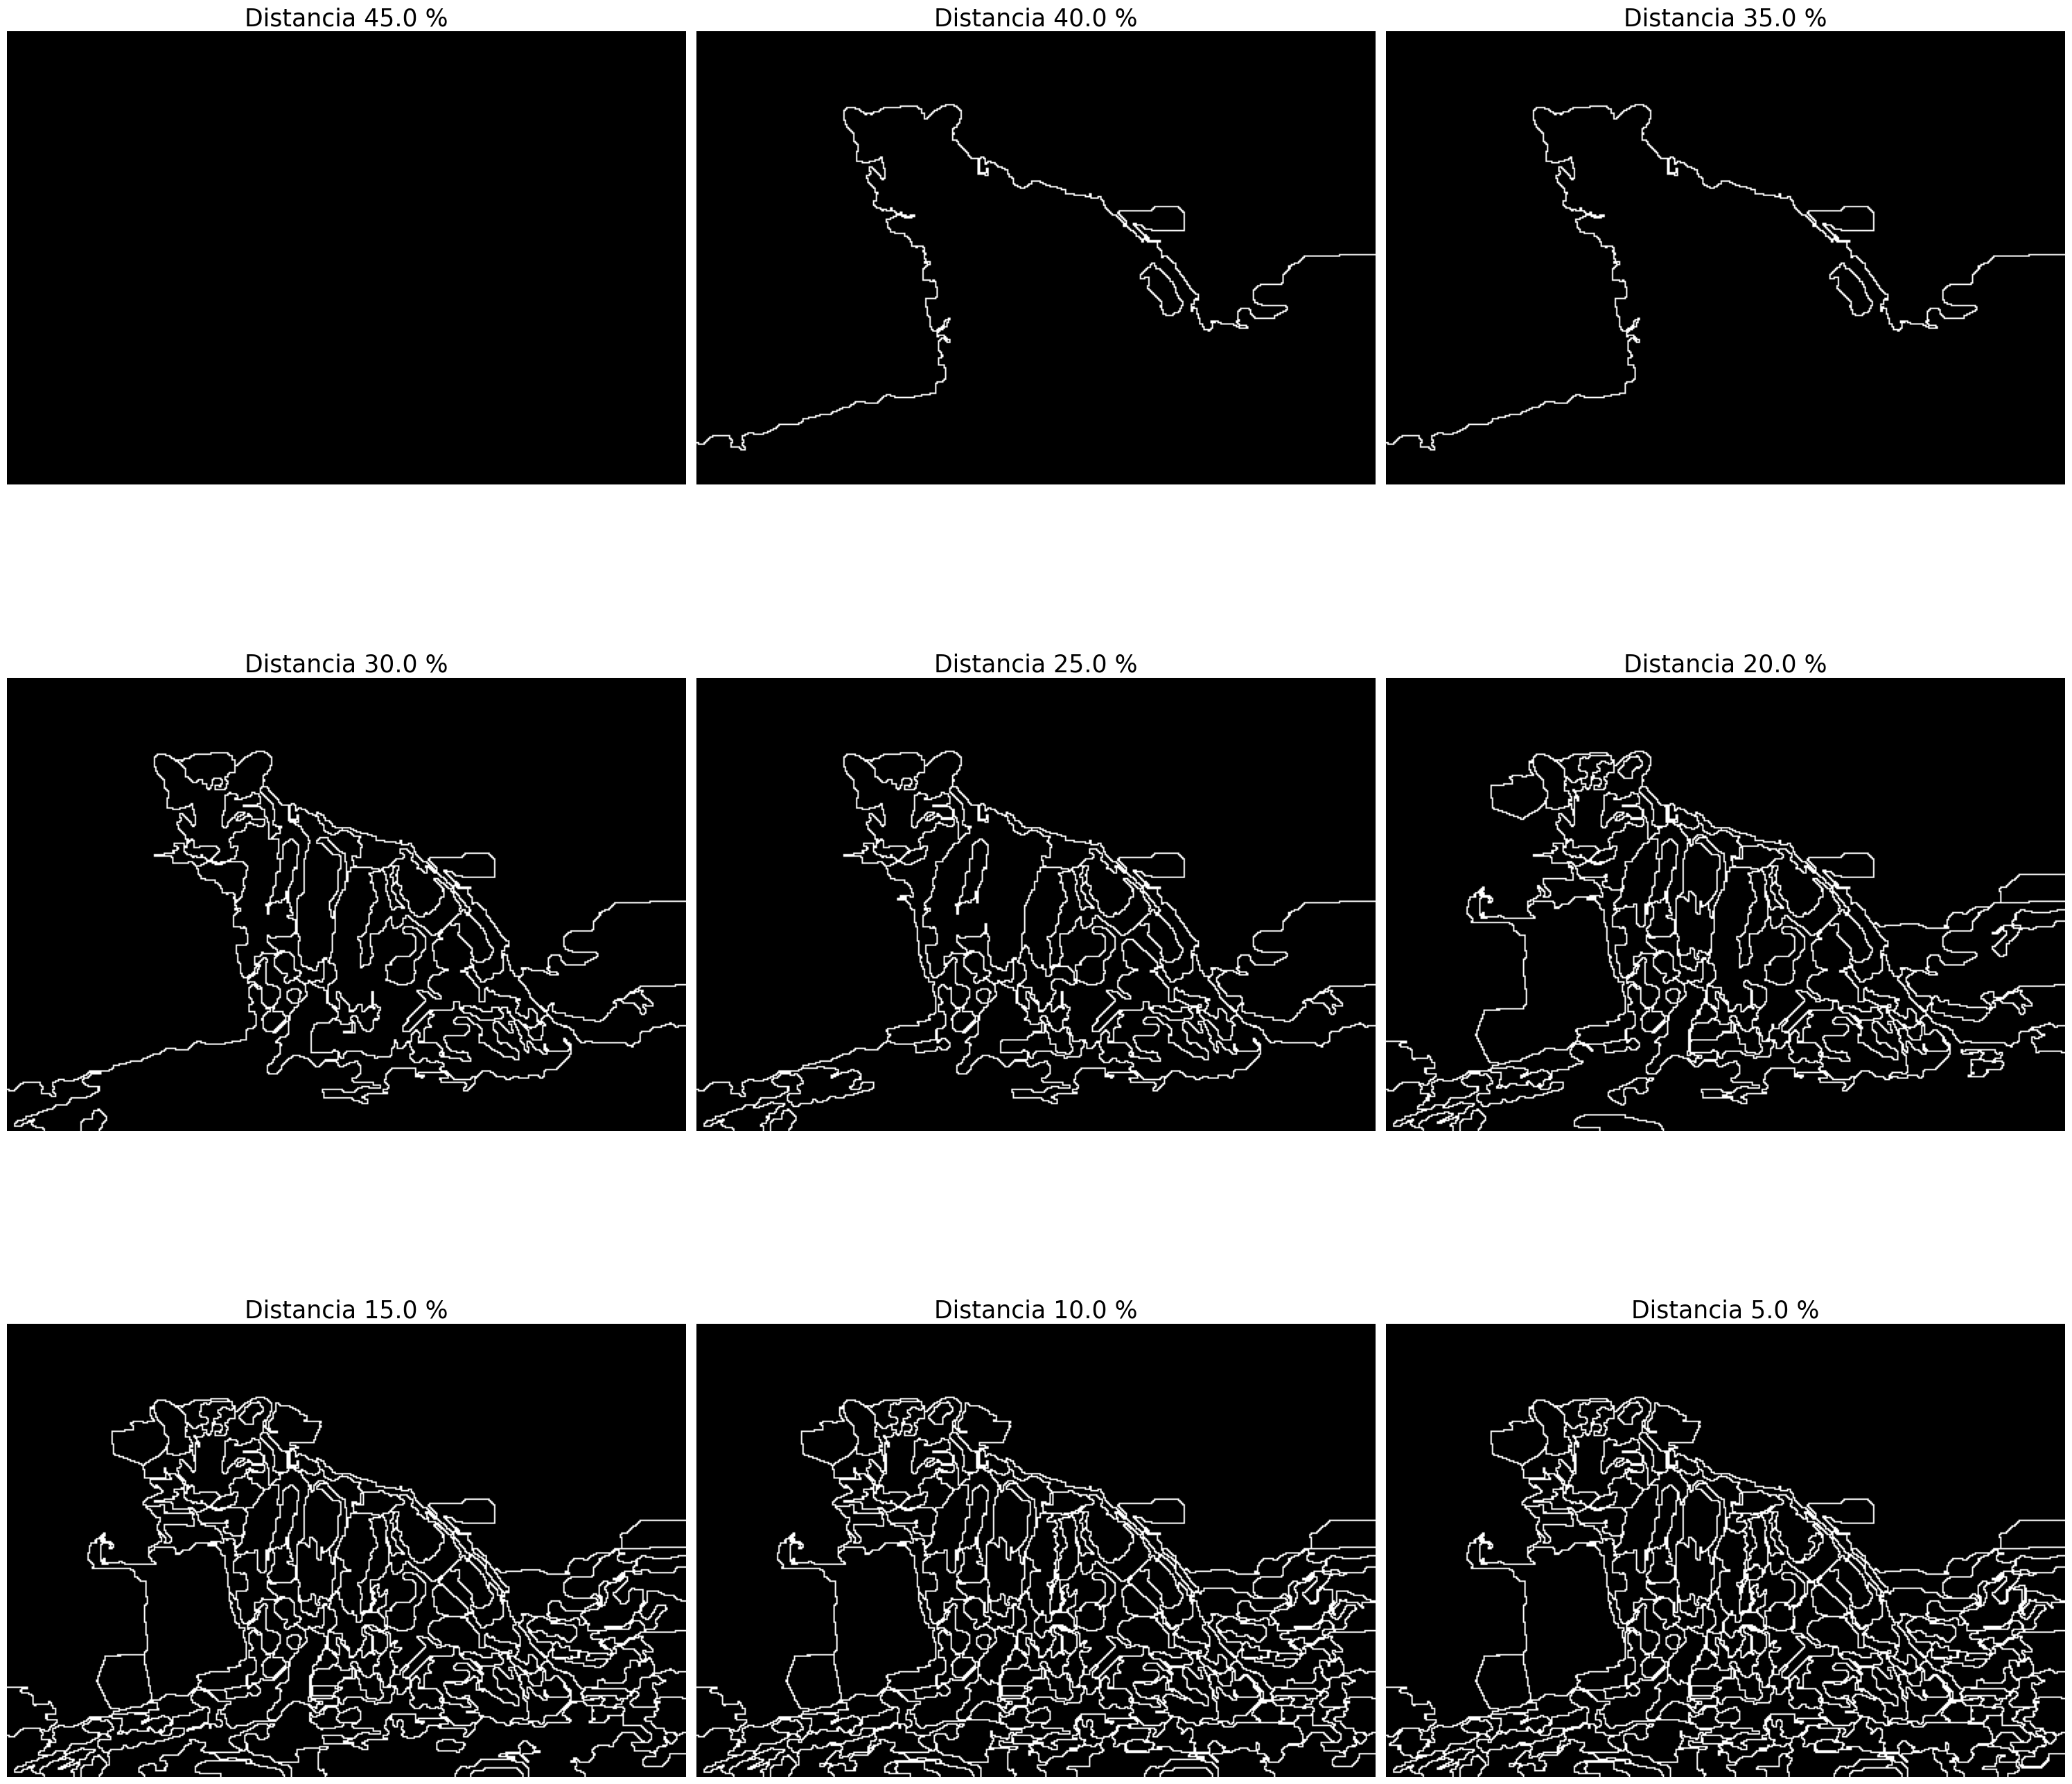

In [15]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
plt.title(f'Distancia {valores[0]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[0], cmap="gray")
plt.axis('off')
plt.subplot(3,3,2)
plt.title(f'Distancia {valores[1]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[1], cmap="gray")
plt.axis('off')
plt.subplot(3,3,3)
plt.title(f'Distancia {valores[2]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[2], cmap="gray")
plt.axis('off')

plt.subplot(3,3,4)
plt.title(f'Distancia {valores[3]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[3], cmap="gray")
plt.axis('off')
plt.subplot(3,3,5)
plt.title(f'Distancia {valores[4]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[4], cmap="gray")
plt.axis('off')
plt.subplot(3,3,6)
plt.title(f'Distancia {valores[5]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[5], cmap="gray")
plt.axis('off')

plt.subplot(3,3,7)
plt.title(f'Distancia {valores[6]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[6], cmap="gray")
plt.axis('off')
plt.subplot(3,3,8)
plt.title(f'Distancia {valores[7]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[7], cmap="gray")
plt.axis('off')
plt.subplot(3,3,9)
plt.title(f'Distancia {valores[8]*100} %',fontsize=25)
plt.imshow(bordes_n_mega[8], cmap="gray")
plt.axis('off')


plt.tight_layout()

## RESULTADOS

In [16]:
check=(bordes_limpios/255).astype(np.uint8)

In [17]:
p=[]
r=[]
asa=[]
s=[]
f1=[]
p_sin=[]
r_sin=[]
f1_sin=[]


for i in range(len(n_mega)-1):
    print(f"Datos {valores[i]}")
    v_br=test_BR(bordes_n_mega[i],bordes_image_G_S)
    v_br_sin=test_BR(bordes_n_mega[i],check)
    print("segmentos:",np.max(n_mega[i]))
    v_asa=ASA(n_mega[i],image_G_S)
    if (v_br[0]+v_br[1])!=0:  print("F1 score: ",round((2*((v_br[0]*v_br[1])/(v_br[0]+v_br[1]))),4))
    print("\n")
    p.append(v_br[1])
    p_sin.append(v_br_sin[1])
    r.append(v_br[0])
    r_sin.append(v_br_sin[0])
    asa.append(v_asa)
    s.append(np.max(n_mega[i]))
    if (v_br[0]+v_br[1])!=0:f1.append(round((2*((v_br[0]*v_br[1])/(v_br[0]+v_br[1]))),4))
    if (v_br[0]+v_br[1])==0:f1.append(0)
    if (v_br_sin[0]+v_br_sin[1])!=0:f1_sin.append(round((2*((v_br_sin[0]*v_br_sin[1])/(v_br_sin[0]+v_br_sin[1]))),4))
    if (v_br_sin[0]+v_br_sin[1])==0:f1_sin.append(0)

print("DATOS GS")
print("Recall: ",r)
print("Precision: ",p)
print("Segmentos: ",s)
print("ASA: ",asa)
print("F1:",f1)
print("DATOS SIN")
print("Recall-bordes limpios: ",r_sin)
print("Precision-bordes limpios: ",p_sin)
print("F1-bordes limpios:",f1_sin)


Datos 0.45
recall: 0.0
precision: 0
recall: 0.0
precision: 0
segmentos: 1
aciertos:  40090 total:  154401 ASA: 0.2596


Datos 0.4
recall: 0.5047
precision: 0.5603
recall: 0.1864
precision: 0.7167
segmentos: 3
aciertos:  122482 total:  154401 ASA: 0.7933
F1 score:  0.531


Datos 0.35
recall: 0.5047
precision: 0.5603
recall: 0.1864
precision: 0.7167
segmentos: 3
aciertos:  122482 total:  154401 ASA: 0.7933
F1 score:  0.531


Datos 0.3
recall: 0.8307
precision: 0.2024
recall: 0.7858
precision: 0.8097
segmentos: 30
aciertos:  140345 total:  154401 ASA: 0.909
F1 score:  0.3255


Datos 0.25
recall: 0.8457
precision: 0.1945
recall: 0.8428
precision: 0.811
segmentos: 35
aciertos:  145346 total:  154401 ASA: 0.9414
F1 score:  0.3163


Datos 0.2
recall: 0.8919
precision: 0.1481
recall: 0.9127
precision: 0.7009
segmentos: 81
aciertos:  147308 total:  154401 ASA: 0.9541
F1 score:  0.254


Datos 0.15
recall: 0.9706
precision: 0.1265
recall: 0.9897
precision: 0.6457
segmentos: 137
aciertos:  149464 

In [18]:
# buena=f1.index(max(f1))
buena=f1_sin.index(max(f1_sin))
print(buena)

4


## Imagenes grabar

In [21]:
sel=buena

In [22]:
 # Crear un kernel para la dilatación (en este caso, un cuadro 3x3)
kernel = np.ones((2, 2), np.uint8)

    # Aplicar la dilatación a la imagen 
bordes_image_G_S3 = cv2.dilate(bordes_image_G_S, kernel, iterations=1)
bordes_n_mega3 = cv2.dilate(bordes_n_mega[sel], kernel, iterations=1)  

    

In [23]:
np.unique(n_mega[sel])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [24]:
#componemos la imagen final

final=np.copy(imagen_org)

#creamos un borde rojo para diferenciarlo

final[:,:,0]=np.where(bordes_n_mega3==1,255,final[:,:,0])


#componemos la imagen de referencia

master3=np.copy(imagen_org)

#creamos un borde rojo para diferenciarlo

master3[:,:,0]=np.where(bordes_image_G_S3==1,255,master3[:,:,0])

#creamos una comparativa entre ambos bordes
tamano=list(np.shape(bordes_n_mega[sel]))
tamano.append(3)
# comp3=np.zeros(tamano)
comp3=np.ones(tamano)*255
# comp3[:,:,0]=(bordes_n_mega[sel]*255)
#poner los bordes rojos 
comp3[:,:,1]=np.where(bordes_n_mega[sel]==1,0,comp3[:,:,1])
comp3[:,:,2]=np.where(bordes_n_mega[sel]==1,0,comp3[:,:,2])

comp3[:,:,2]=np.where(bordes_image_G_S3==1,0,comp3[:,:,2])
comp3[:,:,1]=np.where(bordes_image_G_S3==1,0,comp3[:,:,1])
comp3[:,:,0]=np.where(bordes_image_G_S3==1,0,comp3[:,:,0])

#donde coincidan quito el canal rojo y azul para que se vea verde
# comp3[:,:,2]=np.where(bordes_n_mega[sel]==1,0,comp3[:,:,2])
# comp3[:,:,0]=np.where(bordes_n_mega[sel]+bordes_image_G_S3==2,0,comp3[:,:,0])
comp3[:,:,1]=np.where(bordes_n_mega[sel]+bordes_image_G_S3==2,255,comp3[:,:,1])


#convierto a uint8
comp3=comp3.astype(np.uint8)


(-0.5, 480.5, 320.5, -0.5)

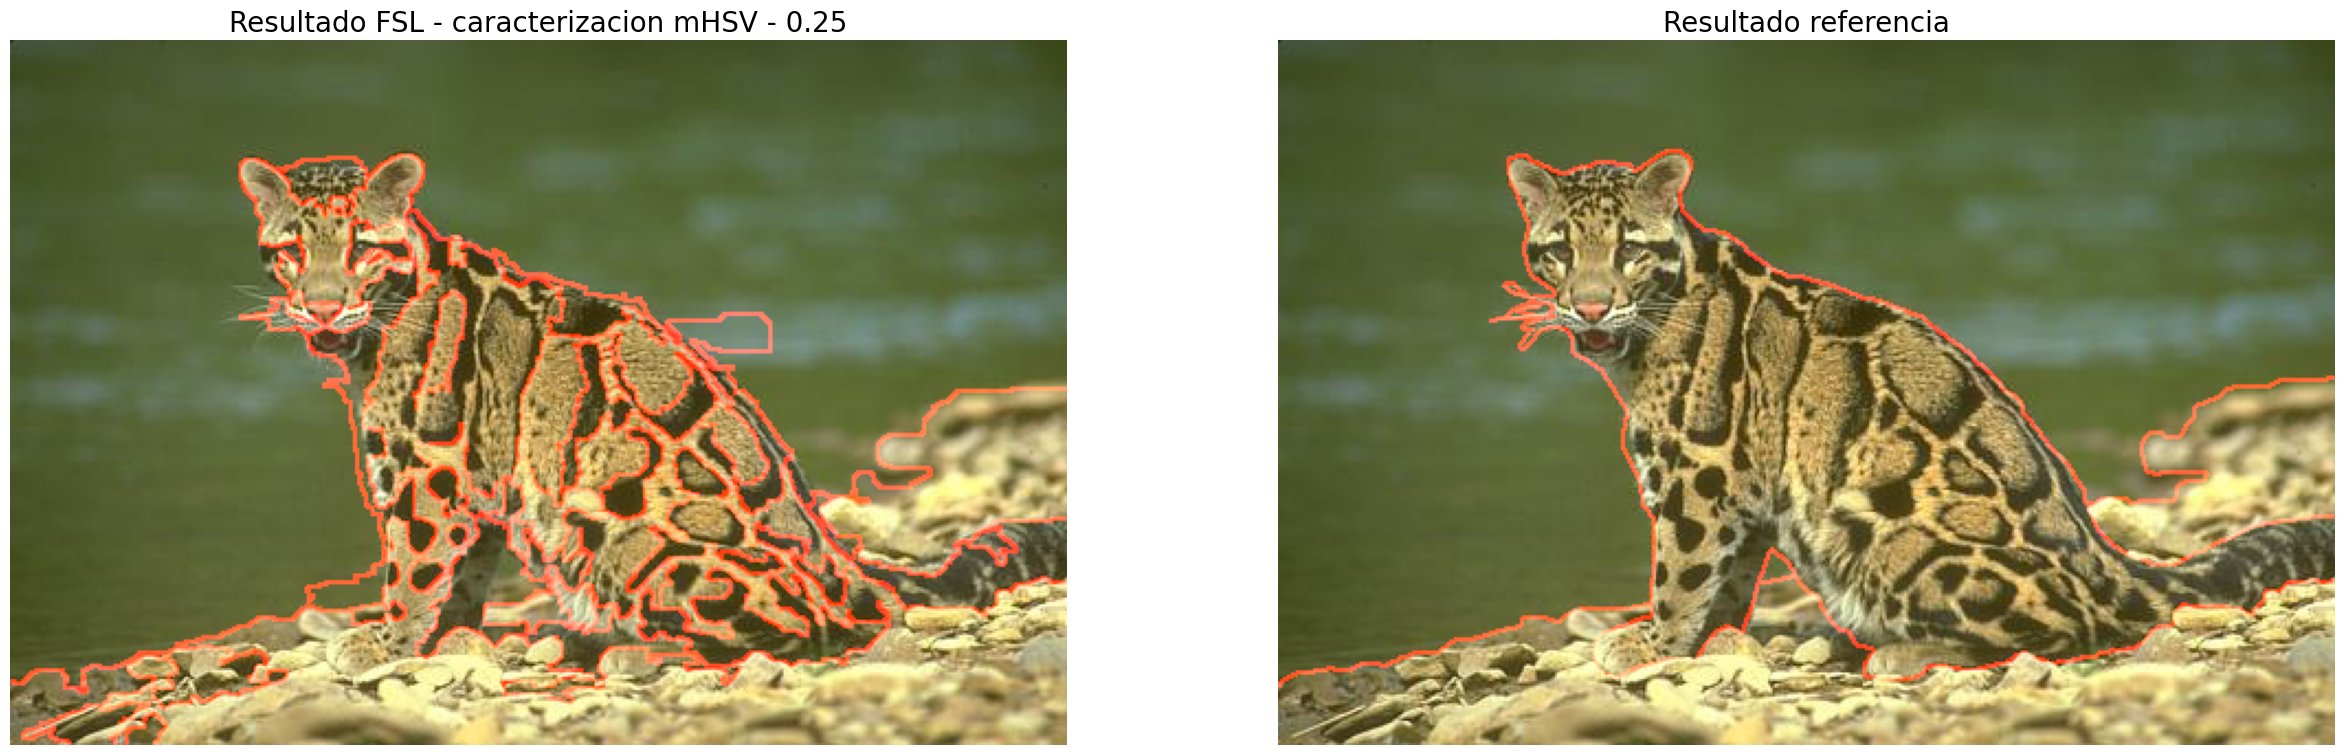

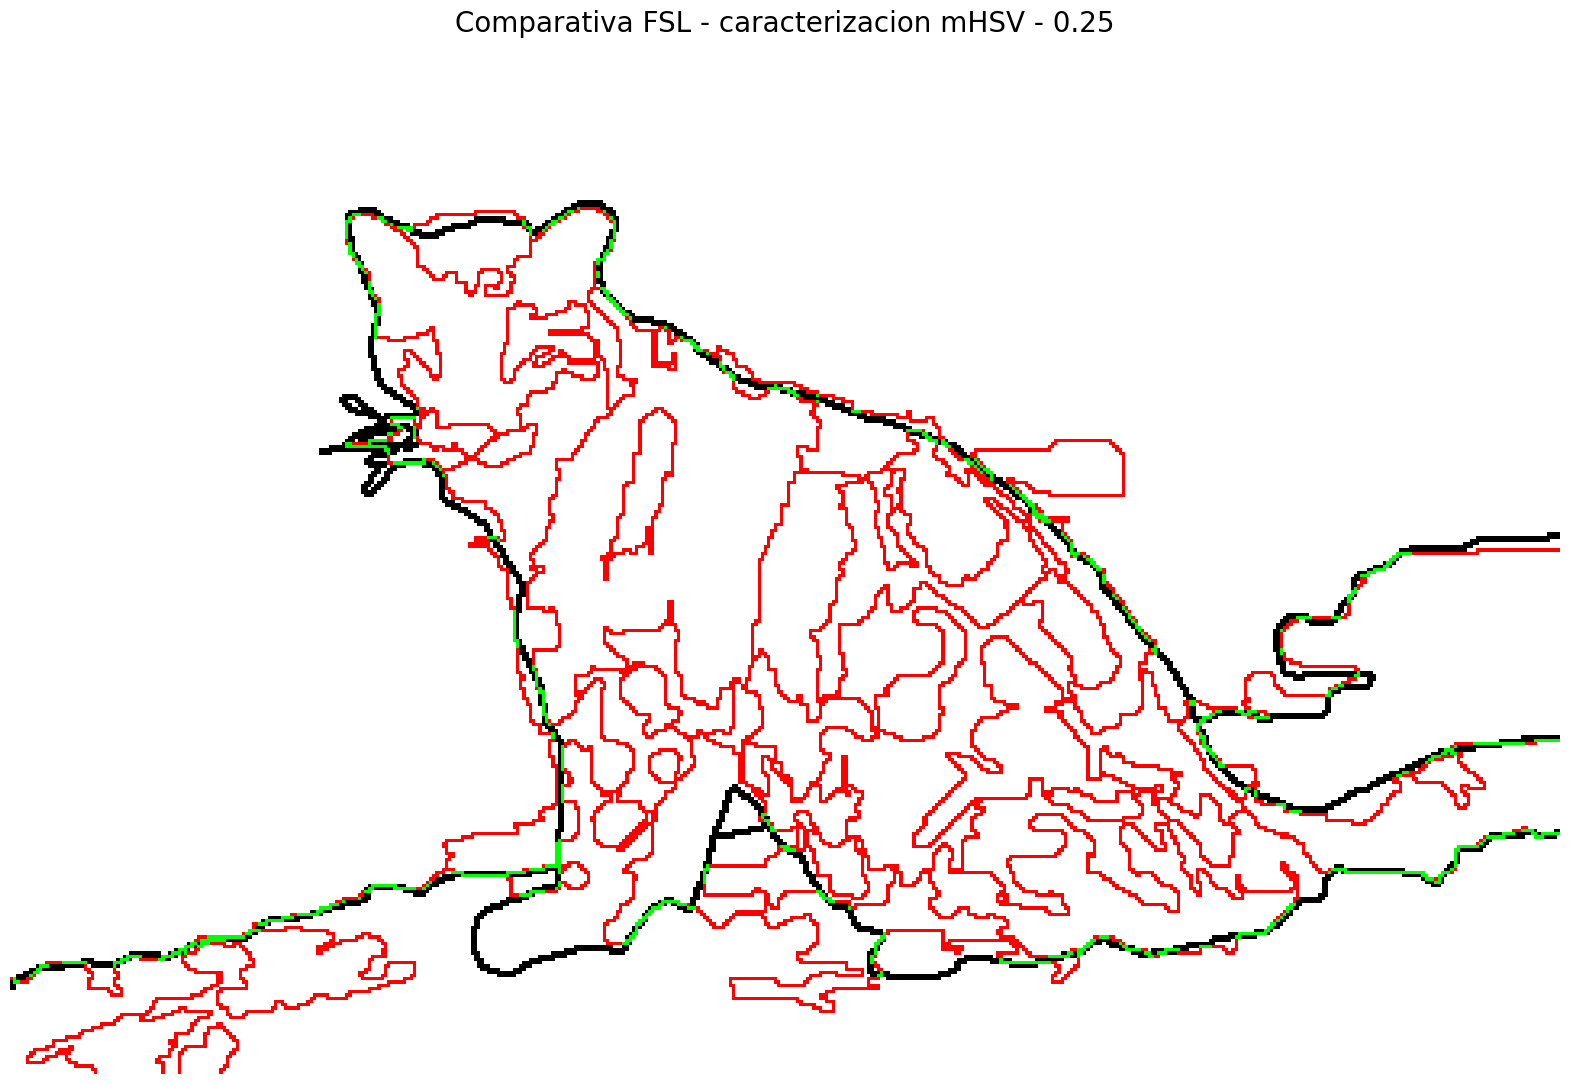

In [25]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.title(f'Resultado {seg} - caracterizacion {car} - {valores[sel]}',fontsize=20)
plt.imshow(final)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Resultado referencia',fontsize=20)
plt.imshow(master3)
plt.axis('off')

plt.figure(figsize=(20, 20))

plt.title(f'Comparativa {seg} - caracterizacion {car} - {valores[sel]}',fontsize=20)
plt.imshow(comp3)
plt.axis('off')

In [27]:
#Guardo imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"fase5_1_B_"+str(foto)+"_"+str(int(valores[sel]*100))+".jpg"), final)
io.imsave(os.path.join(memoria,"fase5_2_B_"+str(foto)+"_"+str(int(valores[sel]*100))+".jpg"), master3)
io.imsave(os.path.join(memoria,"fase5_3_B_"+str(foto)+"_"+str(int(valores[sel]*100))+".jpg"), comp3)

In [28]:
print(int(valores[sel]*100))

25


In [29]:
np.unique(bordes_n_mega[sel])

array([0., 1.])

In [30]:

ruta_datos="info_imagenes_test"
datos=[r,p,s,asa,f1]
datos_np=np.array(datos)
np.save(os.path.join(ruta_datos,"fase5_3_B_"+str(foto)+"_"+str(int(valores[sel]*100))), datos)
np.savetxt(os.path.join(ruta_datos,"fase5_3_B_"+str(foto)+"_"+str(int(valores[sel]*100))+".csv"), datos, delimiter=',')
np.savetxt(os.path.join(ruta_datos,"intercambio"+".csv"), datos_np[:,sel], delimiter=',')